### Problem Statement 

Implement dynamic pricing strategies for fitness classes based on demand, time, and location

- cult.fit (formerly cure.fit or Curefit) is a health and fitness company offering digital and offline experiences across fitness, nutrition, and mental well-being. With the aim to make fitness fun and easy, cult.
- Provided with the raw data, we need to built a predictive pricing strategy model for improving the revenue of cult.fit

##### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##### Load Prepared Data

In [3]:
data = pd.read_excel('Data_Cult_fit_Lakshmi.xlsx')

In [5]:
data

,Unnamed: 0,ActivitySiteID,BookingEndDateTime,BookingStartTime,MaxBookees,Number_Booked,Price,BookingEndMonth,BookingEndDay,Booking_Start_Hour,Booking_Start_Min,Activity,Activity_Time,Activity_Duration
0,0,BRP,2018-04-01,09:00:00,35,29,1499,4,1,9,0,BodyCombat,09:00AM - 10:00AM,60
1,1,BRP,2018-04-01,10:00:00,20,15,1999,4,1,10,0,HattonABC,10:00AM - 11:00AM,60
2,2,HXP,2018-04-01,10:00:00,27,20,1999,4,1,10,0,StudioCyc,10:00AM - 11:00AM,60
3,3,HXP,2018-04-01,09:05:00,27,27,1999,4,1,9,5,StudioCyc,09:05AM - 10:05AM,60
4,4,TSC,2018-04-01,10:00:00,30,13,1299,4,1,10,0,BodyConditioning,10:00AM - 11:00AM,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,3266,BRP,2018-06-30,09:00:00,35,21,1999,6,30,9,0,BodyAttack,09:00AM - 10:00AM,60
3267,3267,TSC,2018-06-30,08:30:00,24,11,2999,6,30,8,30,BarrePilates,08:30AM - 09:30AM,60
3268,3268,NBL,2018-06-30,12:00:00,60,9,2999,6,30,12,0,BarrePilates,12:00PM - 01:00PM,60
3269,3269,SBP,2018-06-30,08:30:00,20,6,3999,6,30,8,30,MMACond,08:30AM - 09:30AM,60


In [12]:
# drop Unnamed: 0 which is not required 
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [14]:
data.columns
#the unwanted column got dropped

Index(['ActivitySiteID', 'BookingEndDateTime', 'BookingStartTime',
       'MaxBookees', 'Number_Booked', 'Price', 'BookingEndMonth',
       'BookingEndDay', 'Booking_Start_Hour', 'Booking_Start_Min', 'Activity',
       'Activity_Time', 'Activity_Duration'],
      dtype='object')

### EDA - Exploratory Data Analysis

Visualising and understanding the data

<Axes: xlabel='ActivitySiteID', ylabel='count'>

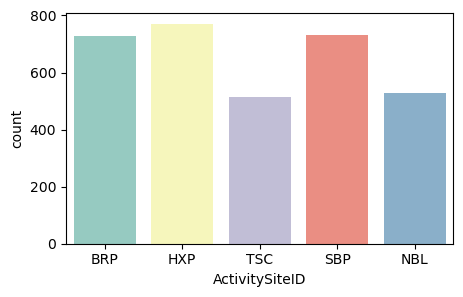

In [70]:
plt.figure(figsize=(5,3))
palette = sns.color_palette("Set3")
sns.countplot(x = data['ActivitySiteID'],palette=palette)

- The number of info collected are directing more to HXP program

<Axes: xlabel='MaxBookees', ylabel='count'>

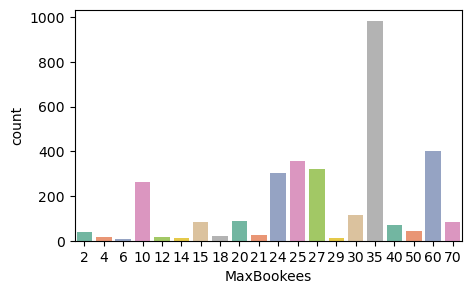

In [21]:
plt.figure(figsize=(5,3))
palette = sns.color_palette("Set2")
sns.countplot(x = data['MaxBookees'],palette=palette)

- There are batches where number batch size is 70
- There are more batches where batch size is 35,10,24,25,27
- There is a batch size of 2 too in the data collected

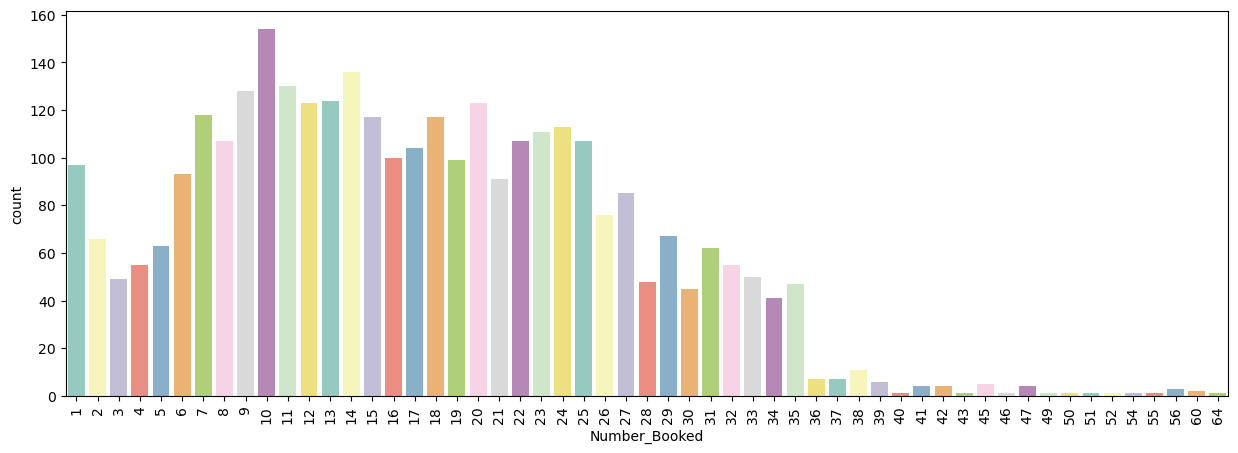

In [356]:
plt.figure(figsize=(15,5))
palette = sns.color_palette("Set3")
sns.countplot(x = data['Number_Booked'],palette=palette)
plt.xticks(rotation=90)
plt.show()

- The plot shows the maximum bookings happened in the corresponding batches
- There are many batches with the batch size 10,which concludes the batch size with 10 goes well and attractes customers
- There are very few enrolls happened for batch size more than 35

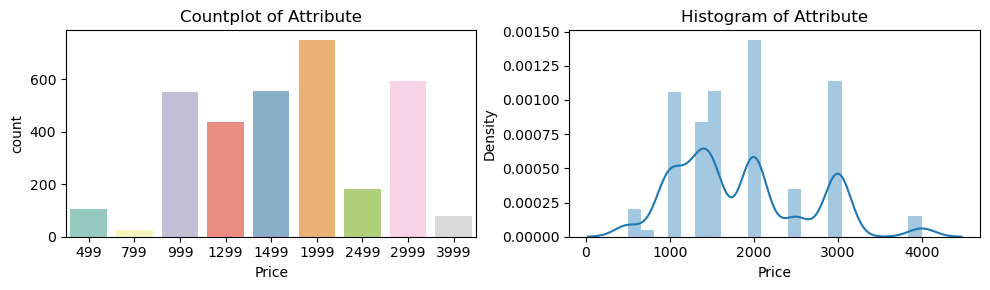

In [60]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(10,3))
palette = sns.color_palette("Set3")
# Countplot for the attribute (not very useful for numerical data, but included for structure)
sns.countplot(x='Price', data=data, ax=ax[0],palette=palette)
ax[0].set_title('Countplot of Attribute')

# Histogram for the attribute
sns.distplot(data['Price'],  kde=True, ax=ax[1])
ax[1].set_title('Histogram of Attribute')


# Adjust layout
plt.tight_layout()
plt.show()

- There are many activites which are priced for Rs.1999 
- The distribution is not normal

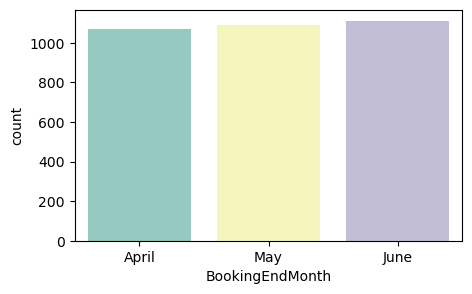

In [88]:
plt.figure(figsize=(5, 3))
palette = sns.color_palette("Set3")
# Countplot for the attribute
ax = sns.countplot(x='BookingEndMonth', data=data, palette=palette)
# Mapping of numbers to months
month_map = {0: 'April', 1: 'May', 2: 'June'}
# Set the x-axis labels to the respective month names
ax.set_xticks([0,1,2])
ax.set_xticklabels([month_map[x] for x in [0,1,2]])
# Display the plot
plt.show()

- We have the April,May and June month bookees data
- Slightly there is more data been collected for the June month

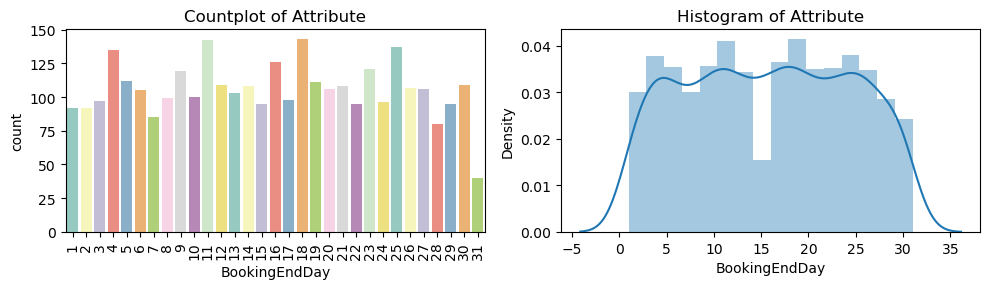

In [449]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
palette = sns.color_palette("Set3")
# Countplot for the attribute (not very useful for numerical data, but included for structure)
sns.countplot(x='BookingEndDay', data=data, ax=ax[0],palette=palette)
ax[0].set_title('Countplot of Attribute')
ax[0].tick_params(axis='x', rotation=90)

# Histogram for the attribute
sns.distplot(data['BookingEndDay'],  kde=True, ax=ax[1])
ax[1].set_title('Histogram of Attribute')


# Adjust layout
plt.tight_layout()
plt.show()

- The bookings have happened on all the days of the month
- The distribution is not normal

In [182]:
a = data.pivot_table(index='Activity', columns='ActivitySiteID', aggfunc='size', fill_value=0)
a

ActivitySiteID,BRP,HXP,NBL,SBP,TSC
Activity,,,,,
20-20-20,37,15,25,13,13
AbsBlast,0,0,0,13,0
Aerobics,23,0,0,1,0
AquaBabies,22,0,0,21,0
AquaFit,65,59,0,58,39
...,...,...,...,...,...
WmBetterLiving,0,0,0,1,0
Yoga,0,0,0,0,52
Yogalates,47,0,0,0,39


In [180]:
data['Activity'] = np.where(data['Activity'] == 'Aquababies' , 
                                   data['Activity'].str.replace('Aquababies', 'AquaBabies', regex=False), 
                                   data['Activity'])

data['Activity'] = np.where(data['Activity'] == 'BltWeigh' , 
                                   data['Activity'].str.replace('BltWeigh', 'BLT-WeightManage', regex=False), 
                                   data['Activity'])

<Axes: xlabel='Activity'>

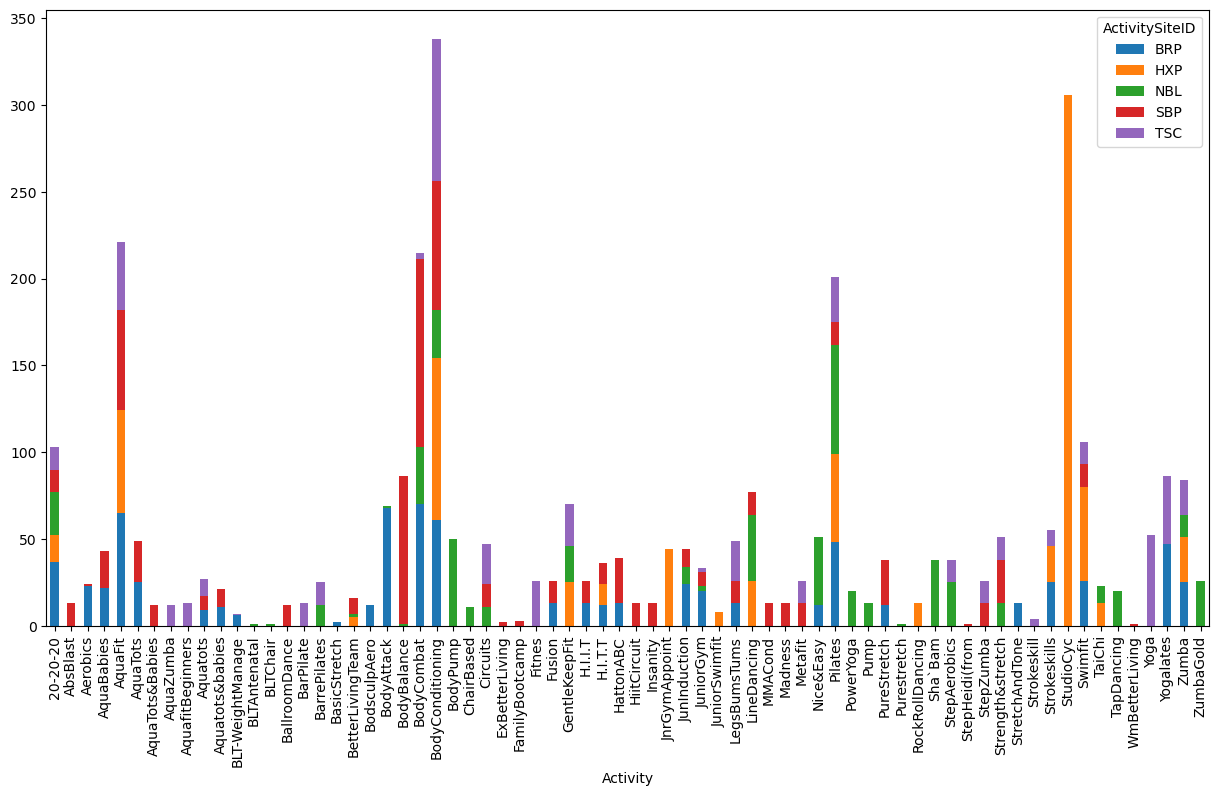

In [187]:
a.plot(kind='bar', stacked=True, figsize=(15, 8))

- StudioCyc, RockRollDancing,JuniorSwimfit,JnrGymAppoint are the activities provided only by side ID HXP
- AdsBlast  , AquaTots&Babies , BallroomDance , EXBetterLiving , FamilyBootcamp , HiitCircuit , Insanity , MMACond , Madness , StepHeidi , WMBatterLiving are only provided by SBP
- AquaZumba , AquafitBeginners , Barpilate , Fitness,Strokeskill , yoga , BLT-WeightManage are provided by TSC
- BLTAntenatal , BLTChair , BodyPump , ChairBased ,PowerYoga,PumpYoga , Sha`Bam ,TopDancing , ZumbaGold provided by NBL
- BodsculpAero , BodyAttack , StrechAndTone provided by BRP

- AquaFit , BodyCombat , BodyConditioning , Pilates , StudioCyc ,20-20-20,Zumba these are regiestered by many 

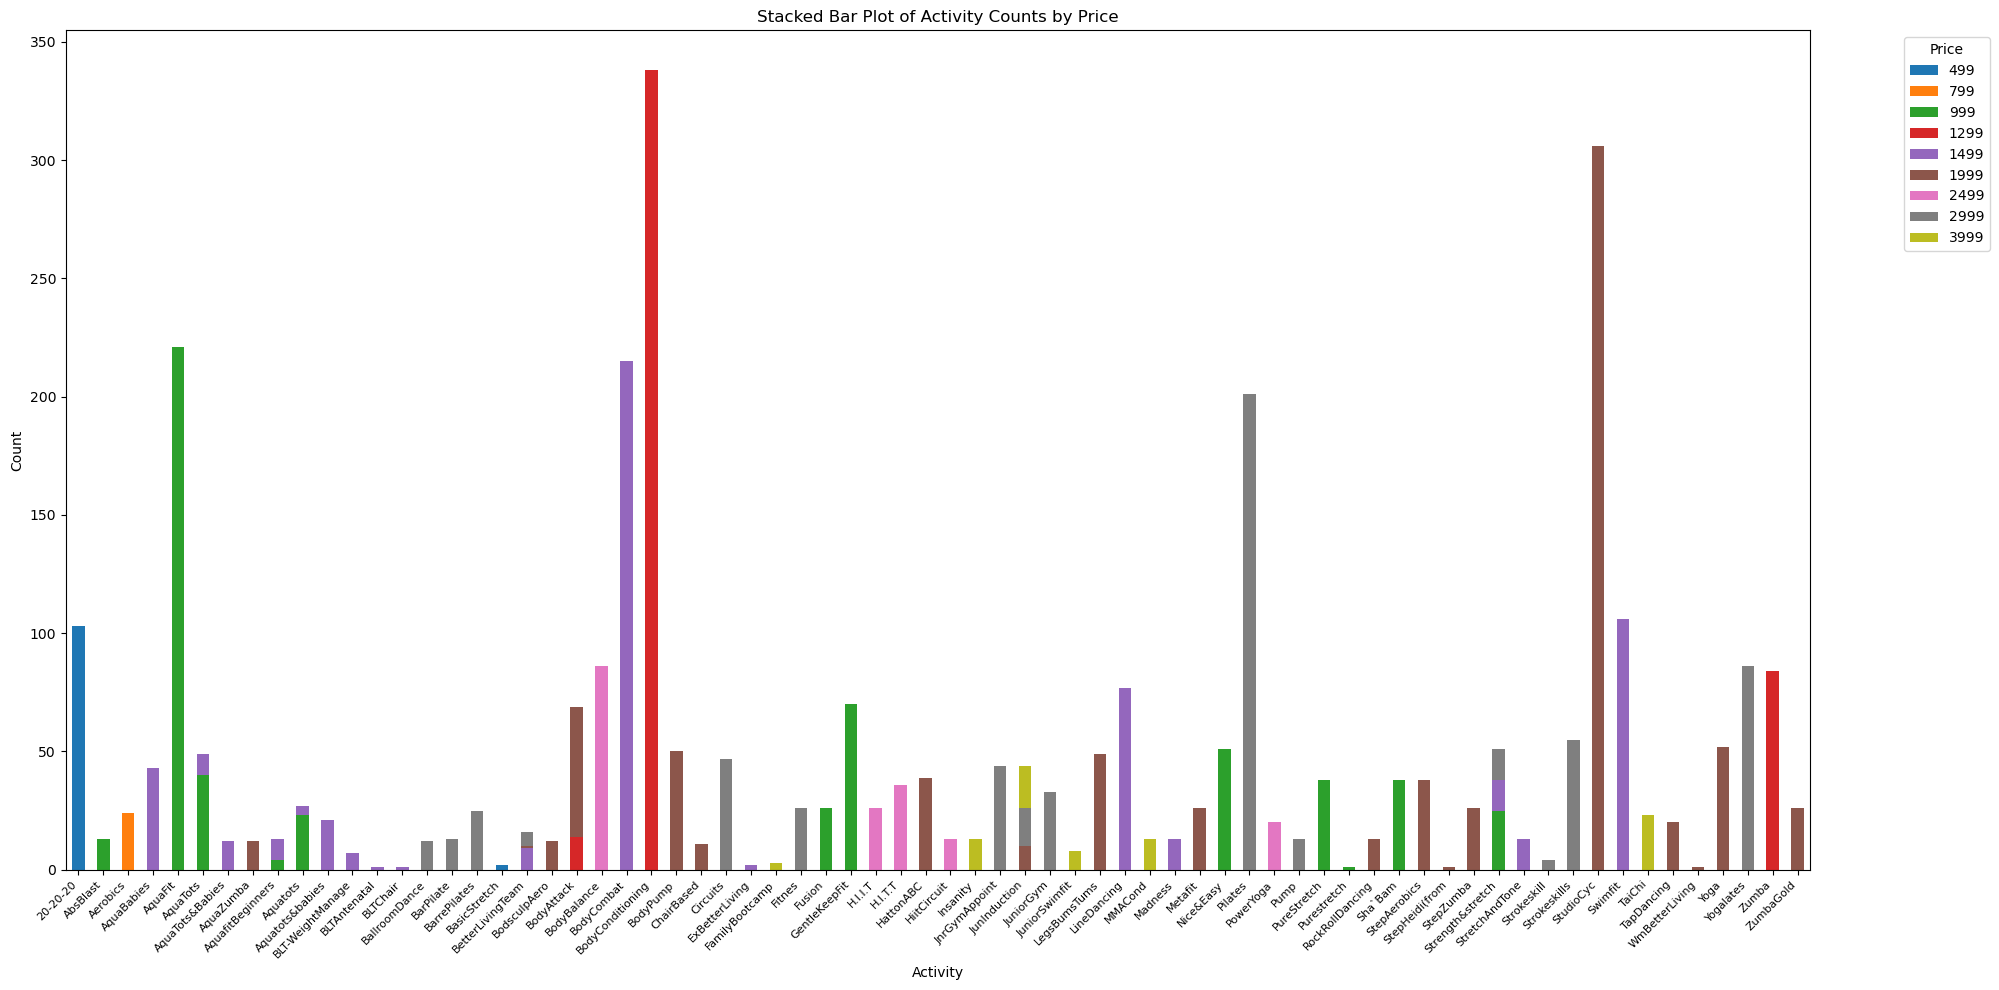

In [263]:
c = data.pivot_table(index='Activity', columns='Price', aggfunc='size', fill_value=0)

# Plot stacked bar plot
ax = c.plot(kind='bar', stacked=True, figsize=(20, 10))

# Rotate labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)

plt.title('Stacked Bar Plot of Activity Counts by Price')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.legend(title='Price', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- JUNInduction is sold for 1999,3999,2999
- Strength and Stretch are sold 1499, 2999 and 999(for more people)
- Aquatots,AquafitBeginners,Aquatots, sold for 999 and 1499
- BLT for for 1499 and 2999
- BodyAttack for 1299 and 1999
- Rest are having their unuique price

In [274]:
pd.set_option('display.max_rows', None)

In [278]:
b = data.pivot_table(index=['ActivitySiteID','Activity'], columns='Price', aggfunc='size', fill_value=0)
b

Price                            499   799   999   1299  1499  1999  2499  \
ActivitySiteID Activity                                                     
BRP            20-20-20            37     0     0     0     0     0     0   
               Aerobics             0    23     0     0     0     0     0   
               AquaBabies           0     0     0     0    22     0     0   
               AquaFit              0     0    65     0     0     0     0   
               AquaTots             0     0    16     0     9     0     0   
               Aquatots             0     0     5     0     4     0     0   
               Aquatots&babies      0     0     0     0    11     0     0   
               BLT-WeightManage     0     0     0     0     6     0     0   
               BasicStretch         2     0     0     0     0     0     0   
               BodsculpAero         0     0     0     0     0    12     0   
               BodyAttack           0     0     0    14     0    54     0   
               BodyCombat           0     0     0     0    70     0     0   
               BodyConditioning     0     0     0    61     0     0     0   
               Fusion               0     0    13     0     0     0     0   
               H.I.I.T              0     0     0     0     0     0    13   
               H.I.T.T              0     0     0     0     0     0    12   
               HattonABC            0     0     0     0     0    13     0   
               JunInduction         0     0     0     0     0     0     0   
               JuniorGym            0     0     0     0     0     0     0   
               LegsBumsTums         0     0     0     0     0    13     0   
               Nice&Easy            0     0    12     0     0     0     0   
               Pilates              0     0     0     0     0     0     0   
               PureStretch          0     0    12     0     0     0     0   
               StretchAndTone       0     0     0     0    13     0     0   
               Strokeskills         0     0     0     0     0     0     0   
               Swimfit              0     0     0     0    26     0     0   
               Yogalates            0     0     0     0     0     0     0   
               Zumba                0     0     0    25     0     0     0   
HXP            20-20-20            15     0     0     0     0     0     0   
               AquaFit              0     0    59     0     0     0     0   
               BetterLivingTeam     0     0     0     0     5     0     0   
               BodyConditioning     0     0     0    93     0     0     0   
               GentleKeepFit        0     0    25     0     0     0     0   
               H.I.T.T              0     0     0     0     0     0    12   
               JnrGymAppoint        0     0     0     0     0     0     0   
               JuniorSwimfit        0     0     0     0     0     0     0   
               LineDancing          0     0     0     0    26     0     0   
               Pilates              0     0     0     0     0     0     0   
               RockRollDancing      0     0     0     0     0    13     0   
               Strokeskills         0     0     0     0     0     0     0   
               StudioCyc            0     0     0     0     0   306     0   
               Swimfit              0     0     0     0    54     0     0   
               TaiChi               0     0     0     0     0     0     0   
               Zumba                0     0     0    26     0     0     0   
NBL            20-20-20            25     0     0     0     0     0     0   
               BLTAntenatal         0     0     0     0     1     0     0   
               BLTChair             0     0     0     0     1     0     0   
               BarrePilates         0     0     0     0     0     0     0   
               BetterLivingTeam     0     0     0     0     1     1     0   
               BodyAttack           0     0     0     0     0     1     0

- The above Pivot table shows the price for different activity provided by different activity site

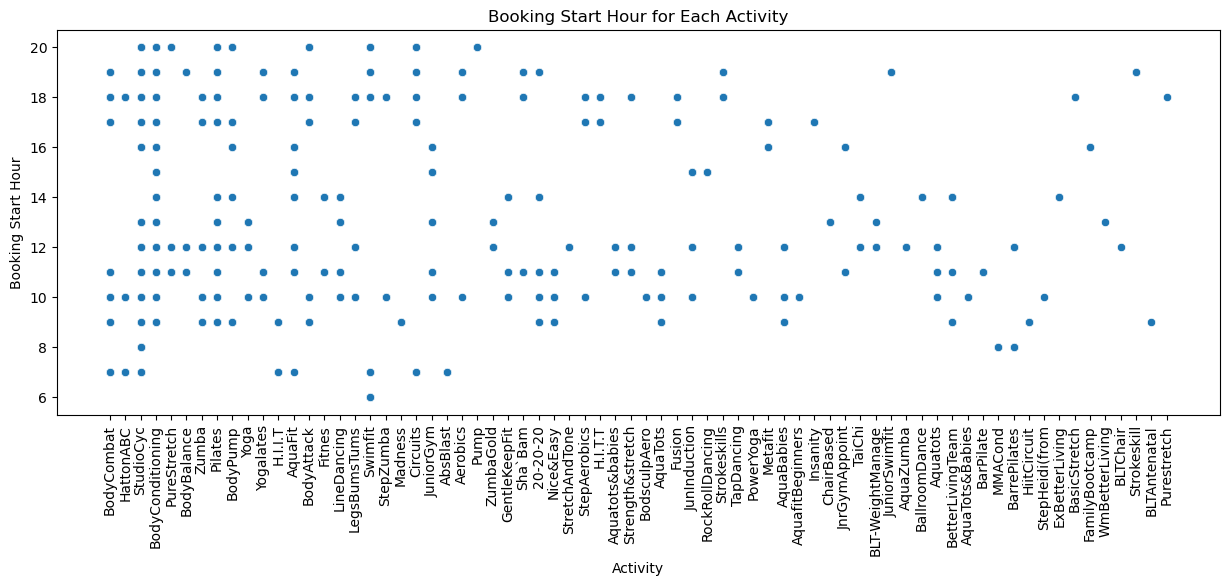

In [339]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Activity', y='Booking_Start_Hour', data=data)
plt.xticks(rotation=90)
plt.title('Booking Start Hour for Each Activity')
plt.xlabel('Activity')
plt.ylabel('Booking Start Hour')
plt.show()

- The above plot shows the start time of each activity

In [306]:
d = data.pivot_table(index=['ActivitySiteID'], columns='BookingEndMonth', aggfunc='size', fill_value=0)
d

BookingEndMonth,4,5,6
ActivitySiteID,,,
BRP,242,236,249
HXP,256,265,250
NBL,169,177,183
SBP,236,241,254
TSC,165,172,176


- The above tells there are booking happenings constantly without any variation in all the 3 months

In [309]:
d = data.pivot_table(index=['ActivitySiteID','Activity'], columns='BookingEndMonth', aggfunc='size', fill_value=0)
d

BookingEndMonth                    4    5    6
ActivitySiteID Activity                       
BRP            20-20-20           12   13   12
               Aerobics            8    7    8
               AquaBabies          8    6    8
               AquaFit            21   23   21
               AquaTots            8    8    9
               Aquatots            3    2    4
               Aquatots&babies     4    3    4
               BLT-WeightManage    4    1    1
               BasicStretch        0    2    0
               BodsculpAero        4    4    4
               BodyAttack         24   23   21
               BodyCombat         24   20   26
               BodyConditioning   19   18   24
               Fusion              4    5    4
               H.I.I.T             4    5    4
               H.I.T.T             4    4    4
               HattonABC           5    4    4
               JunInduction        7    7   10
               JuniorGym           7    4    9
               LegsBumsTums        4    4    5
               Nice&Easy           4    4    4
               Pilates            17   17   14
               PureStretch         4    4    4
               StretchAndTone      4    5    4
               Strokeskills        8    8    9
               Swimfit             8   10    8
               Yogalates          16   15   16
               Zumba               7   10    8
HXP            20-20-20            7    8    0
               AquaFit            20   19   20
               BetterLivingTeam    1    4    0
               BodyConditioning   28   27   38
               GentleKeepFit       7   10    8
               H.I.T.T             4    4    4
               JnrGymAppoint      16   14   14
               JuniorSwimfit       3    3    2
               LineDancing         8   10    8
               Pilates            17   18   16
               RockRollDancing     4    5    4
               Strokeskills        8    8    5
               StudioCyc         101  104  101
               Swimfit            20   17   17
               TaiChi              4    5    4
               Zumba               8    9    9
NBL            20-20-20            7   10    8
               BLTAntenatal        0    0    1
               BLTChair            0    0    1
               BarrePilates        3    4    5
               BetterLivingTeam    1    0    1
               BodyAttack          1    0    0
               BodyBalance         1    0    0
               BodyCombat         13   13    7
               BodyConditioning    8    7   13
               BodyPump           17   16   17
               ChairBased          4    5    2
               Circuits            4    3    4
               GentleKeepFit       6    7    8
               JunInduction        1    3    6
               JuniorGym           2    1    0
               LineDancing        12   13   13
               Nice&Easy          12   15   12
               Pilates            20   22   21
               PowerYoga           7    5    8
               Pump                4    5    4
               Purestretch         0    0    1
               Sha`Bam            11   13   14
               StepAerobics        7    9    9
               Strength&stretch    4    5    4
               TaiChi              4    2    4
               TapDancing          7    5    8
               Zumba               5    4    4
               ZumbaGold           8   10    8
SBP            20-20-20            4    5    4
               AbsBlast            4    5    4
               Aerobics            0    1    0
               AquaBabies          7    5    9
               AquaFit            20   17   21
               AquaTots            8    6   10
               AquaTots&Babies     4    3    5
               Aquatots            2    2    4
               Aquatots&babies     2    4    4
               BallroomDance       4    4    4
               BetterLivingTeam    4    2    3
     

- The above tells about the bookings in every month w.r.t to different activities and month 

In [330]:
data.pivot_table(index=['ActivitySiteID','Activity','BookingEndMonth',], columns='Price', aggfunc='size', fill_value=0)


Price                                            499   799   999   1299  1499  \
ActivitySiteID Activity         BookingEndMonth                                 
BRP            20-20-20         4                  12     0     0     0     0   
                                5                  13     0     0     0     0   
                                6                  12     0     0     0     0   
               Aerobics         4                   0     8     0     0     0   
                                5                   0     7     0     0     0   
                                6                   0     8     0     0     0   
               AquaBabies       4                   0     0     0     0     8   
                                5                   0     0     0     0     6   
                                6                   0     0     0     0     8   
               AquaFit          4                   0     0    21     0     0   
                                5                   0     0    23     0     0   
                                6                   0     0    21     0     0   
               AquaTots         4                   0     0     8     0     0   
                                5                   0     0     8     0     0   
                                6                   0     0     0     0     9   
               Aquatots         4                   0     0     3     0     0   
                                5                   0     0     2     0     0   
                                6                   0     0     0     0     4   
               Aquatots&babies  4                   0     0     0     0     4   
                                5                   0     0     0     0     3   
                                6                   0     0     0     0     4   
               BLT-WeightManage 4                   0     0     0     0     4   
                                5                   0     0     0     0     1   
                                6                   0     0     0     0     1   
               BasicStretch     5                   2     0     0     0     0   
               BodsculpAero     4                   0     0     0     0     0   
                                5                   0     0     0     0     0   
                                6                   0     0     0     0     0   
               BodyAttack       4                   0     0     0     4     0   
                                5                   0     0     0     5     0   
                                6                   0     0     0     5     0   
               BodyCombat       4                   0     0     0     0    24   
                                5                   0     0     0     0    20   
                                6                   0     0     0     0    26   
               BodyConditioning 4                   0     0     0    19     0   
                                5                   0     0     0    18     0   
                                6                   0     0     0    24     0   
               Fusion           4                   0     0     4     0     0   
                                5                   0     0     5     0     0   
                                6                   0     0     4     0     0   
               H.I.I.T          4                   0     0     0     0     0   
                                5                   0     0     0     0     0   
                                6                   0     0     0     0     0   
               H.I.T.T          4                   0     0     0     0     0   
                                5                   0     0     0     0     0   
                                6                   0     0     0     0     0   
               HattonABC        4                   0     0     0     0     0   
                               

- There is no variation in price w.r.t to month

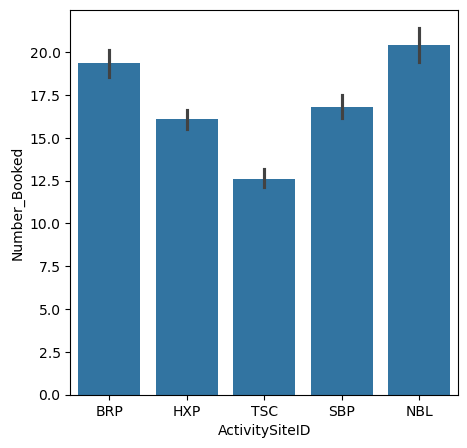

In [396]:
plt.figure(figsize=(5, 5))
sns.barplot(x='ActivitySiteID', y='Number_Booked', data=data)

plt.show()

- More bookings for site NBL

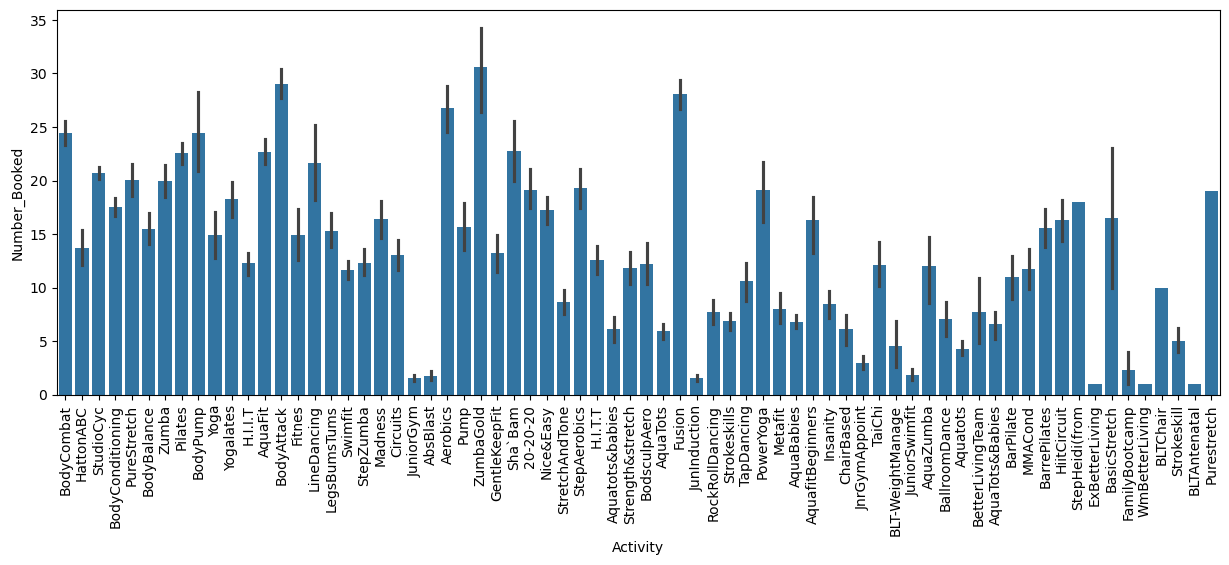

In [383]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Activity', y='Number_Booked', data=data)
plt.xticks(rotation=90)
plt.show()

- There are high number of booking happening for the activity ZumbaGold
- Body Attack is the 2nd highest
- Fusion being 3rd in the race

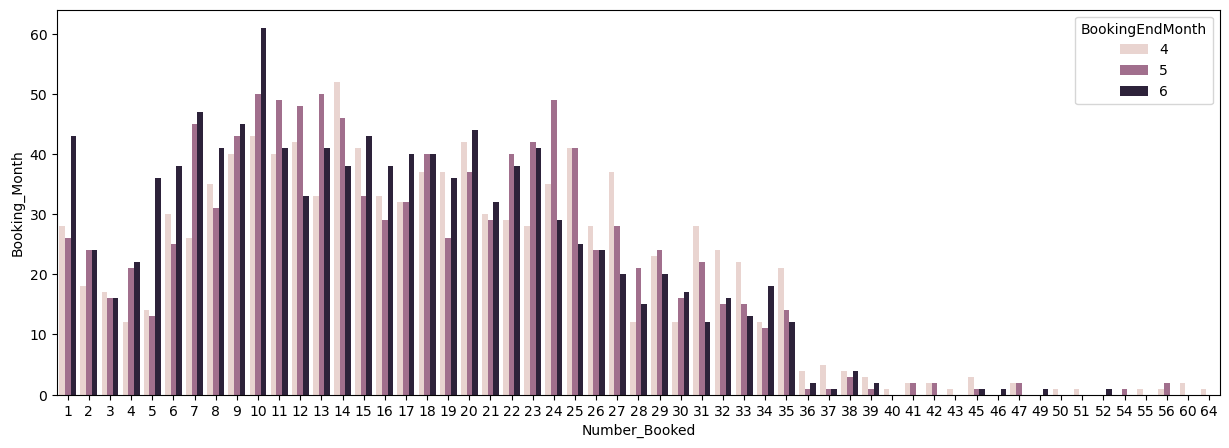

In [407]:
plt.figure(figsize=(15, 5))
sns.countplot(x=data['Number_Booked'],hue=data['BookingEndMonth'])
plt.ylabel('Booking_Month')
plt.show()

- The plot shows the number of bookings happening in different month
- For the batch size of 10, there are more bookings happpned in all the 3 months
- For the batch size above 40 , we see only bookings happening for certian months; Kind of trail and error

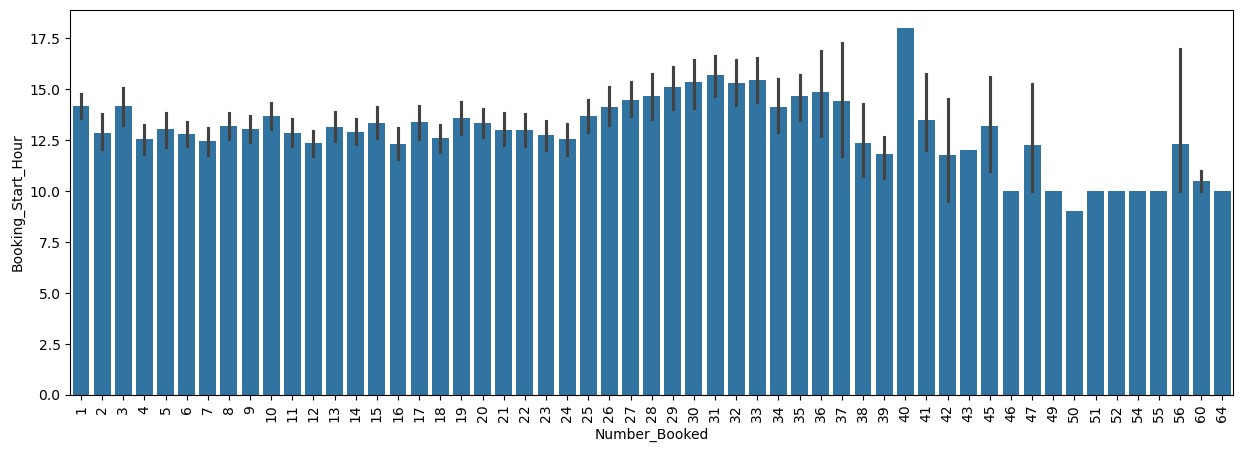

In [381]:
plt.figure(figsize=(15, 5))
sns.barplot(y='Booking_Start_Hour', x='Number_Booked', data=data)
plt.xticks(rotation=90)
plt.show()

- There is a sort of even distribtion in terms of bookings happening for each start time
- This can be concluded bookings are start time dependent

In [458]:
pip install squarify


Note: you may need to restart the kernel to use updated packages.


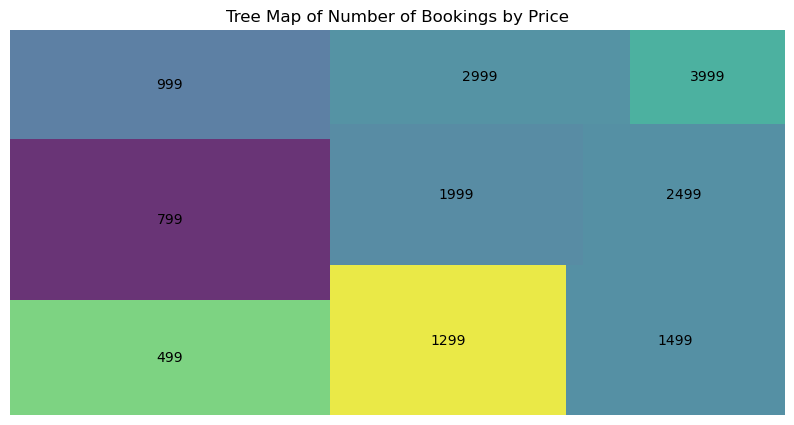

In [480]:
price_agg = data.groupby('Price')['Number_Booked'].mean().reset_index()

# Tree map
plt.figure(figsize=(10, 5))
squarify.plot(sizes=price_agg['Number_Booked'], label=price_agg['Price'], alpha=0.8)
plt.axis('off')
plt.title('Tree Map of Number of Bookings by Price')
plt.show()

- More booking happening for the price 799

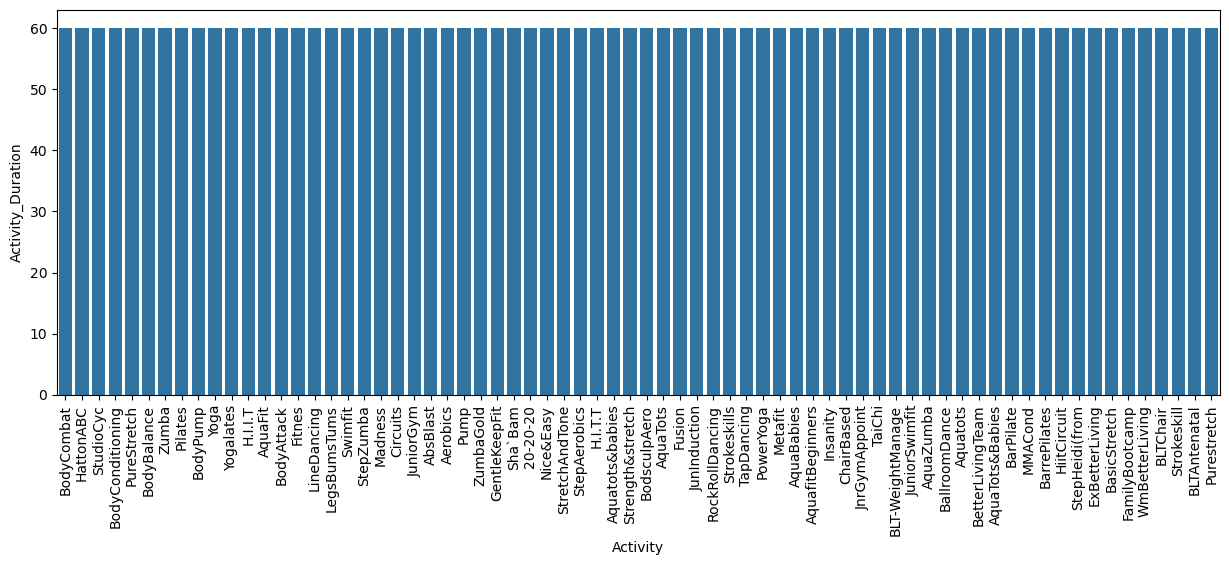

In [419]:
plt.figure(figsize=(15, 5))
sns.barplot(y='Activity_Duration', x='Activity', data=data)
plt.xticks(rotation=90)
plt.show()

- All the activities are held for an hour

In [487]:
data.nunique()

ActivitySiteID         5
BookingEndDateTime    91
BookingStartTime      61
MaxBookees            20
Number_Booked         55
Price                  9
BookingEndMonth        3
BookingEndDay         31
Booking_Start_Hour    15
Booking_Start_Min     11
Activity              70
Activity_Time         61
Activity_Duration      1
dtype: int64

In [493]:
file_name = 'Data1_Cult_fit_Lakshmi.xlsx'
 
# saving the excel
data.to_excel(file_name)